In [ ]:
!pip install pandas numpy matplotlib seaborn nltk textblob scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 23.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)  # Show all columns
sns.set(style="whitegrid")

print("Libraries loaded successfully!")

: 

In [3]:
!pip install --upgrade --quiet project-lib

In [4]:
!pip install ibm-cos-sdk

In [5]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(spark.sparkContext, '932628df-54e7-403a-8275-63dd5904c5c8', 'p-2+5NAyt7nlmAIWfINsooI7EQ==;tE1wXHIlqpq1W/V3Jex4Ew==:1QCqojpymZcm4kPGbnRoSB+IIV6qUU2ndZuMQN4t3j96Y9TJGkPckbw7drrAZXwxwundnsC/GHrVQFDPHkIkYMjl9vDYhcpsfQ==')
pc = project.project_context

from ibm_watson_studio_lib import access_project_or_space
wslib = access_project_or_space({'token':'p-2+5NAyt7nlmAIWfINsooI7EQ==;tE1wXHIlqpq1W/V3Jex4Ew==:1QCqojpymZcm4kPGbnRoSB+IIV6qUU2ndZuMQN4t3j96Y9TJGkPckbw7drrAZXwxwundnsC/GHrVQFDPHkIkYMjl9vDYhcpsfQ=='})
wslib.spark.provide_spark_context(spark.sparkContext)

In [6]:
import pandas as pd
import io

# Load the project token (insert it in a previous cell)
# from project_lib import Project
# project = Project.access()

# List all project assets
project_files = project.get_files()

# Print all files in the project
print("Files in project storage:", project.get_files())

# Replace with the correct file name from your project
file_name = "tweets_with_sentiment_cleaned.csv"

# Read file into Pandas DataFrame
with project.get_file("tweets_with_sentiment_cleaned.csv") as file:
    df = pd.read_csv(io.BytesIO(file.read()))

# Display first few rows
df.head()

Files in project storage: [{'name': 'tweets_with_sentiment_cleaned.csv', 'asset_id': 'f8929e28-efe2-4e17-b3b3-bcd1dd2565bc'}]


,cleaned_text,Sentiment
0,enterprises leverage red hat openshift ibm clo...,Neutral
1,mwc25 kicks today tune thecube exclusive insig...,Positive
2,acquisition might see terraform vault becoming...,Positive
3,ibm announced completed acquisition hashicorp ...,Positive
4,ibms watson ai quantum computing research clou...,Neutral


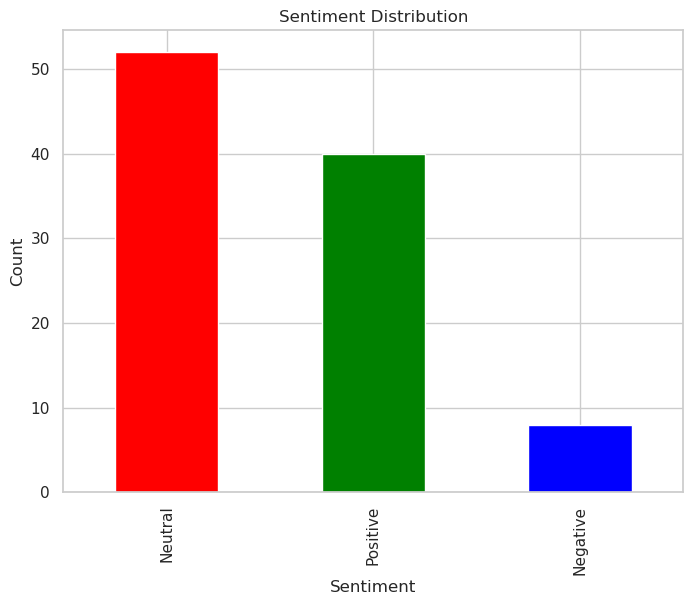

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [8]:
!pip install nltk

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import nltk
import os

nltk_data_path = "/home/spark/shared/nltk_data"
os.environ["NLTK_DATA"] = nltk_data_path

nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean tweets
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply preprocessing to the tweets
df['cleaned_text'] = df['cleaned_text'].apply(preprocess_text)

# Display sample processed tweets
df[['cleaned_text', 'Sentiment']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/spark/shared/nltk_data'
    - '/home/spark/shared/python/nltk_data'
    - '/home/spark/shared/python/share/nltk_data'
    - '/home/spark/shared/python/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # This is missing

[nltk_data] Downloading package punkt to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
import shutil
shutil.rmtree('/home/spark/shared/nltk_data/tokenizers/punkt', ignore_errors=True)

In [14]:
import nltk
nltk.data.path.append('/home/spark/shared/nltk_data')

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean tweets
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply preprocessing to the tweets
df['cleaned_text'] = df['cleaned_text'].apply(preprocess_text)

# Display sample processed tweets
df[['cleaned_text', 'Sentiment']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text,Sentiment
0,enterprises leverage red hat openshift ibm clo...,Neutral
1,mwc kicks today tune thecube exclusive insight...,Positive
2,acquisition might see terraform vault becoming...,Positive
3,ibm announced completed acquisition hashicorp ...,Positive
4,ibms watson ai quantum computing research clou...,Neutral


In [16]:
!pip install ibm-watson-machine-learning

In [17]:
from ibm_watson_machine_learning.foundation_models import ModelInference
from ibm_watson_machine_learning.foundation_models.utils.enums import ModelTypes
import pandas as pd

In [18]:
wml_credentials = {
    "apikey": "c3Pbdp2cwBMQxtw_p0pPe3zBkfysPtW_AJJQyLhTqjv9",
    "url": "https://us-south.ml.cloud.ibm.com"
}

model_inference = ModelInference.from_pretrained(
    ModelTypes.SENTIMENT_ANALYSIS, 
    wml_credentials=wml_credentials, 
    project_id="932628df-54e7-403a-8275-63dd5904c5c8"
)


AttributeError: type object 'ModelInference' has no attribute 'from_pretrained'

In [19]:
pip install ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [20]:
from ibm_watson_machine_learning.foundation_models import ModelInference

In [21]:
import ibm_watson_machine_learning.foundation_models as fm
print(dir(fm))

['Model', 'ModelInference', 'PromptTuner', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'get_custom_model_specs', 'get_model_lifecycle', 'get_model_specs', 'get_model_specs_with_prompt_tuning_support', 'get_supported_tasks', 'inference', 'model', 'prompt_tuner', 'utils']


In [22]:
from ibm_watson_machine_learning.foundation_models import ModelInference

print(dir(ModelInference))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_if_lib_or_def', '_chk_and_block_create_update_for_python36', '_create_revision_artifact', '_create_revision_artifact_for_assets', '_create_wsd_payload', '_generate_stream_with_url', '_generate_with_url', '_generate_with_url_async', '_get_and_cache_spec_ids_for_state', '_get_artifact_details', '_get_asset_based_resource', '_get_filter_func_by_spec_ids', '_get_no_space_artifact_details', '_get_no_space_with_or_without_limit', '_get_required_element_from_dict', '_get_with_or_without_limit', '_handle_response', '_if_deployment_exist_for_asset', '_list', '_prepare_beta_inference_payload', '_prepa

In [35]:
from ibm_watson_machine_learning.foundation_models import ModelInference

# Watson Machine Learning credentials
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",  
    "apikey": "c3Pbdp2cwBMQxtw_p0pPe3zBkfysPtW_AJJQyLhTqjv9"  # 🔴 Replace with your IBM Cloud API Key
}

project_id = "932628df-54e7-403a-8275-63dd5904c5c8"  # 🔴 Replace with your IBM Cloud Project ID

# Load Watson NLP Model (Google FLAN-T5 for Sentiment Analysis)
model_inference = ModelInference(
    model_id="google/flan-t5-xl",
    credentials=wml_credentials,
    project_id=project_id
)


In [36]:
def get_watson_sentiment(text):
    if not text.strip():  # Skip empty tweets
        return "Neutral"
    
    # Format text for Watson NLP
    input_text = f"Classify the sentiment of this sentence: '{text}' (positive, negative, neutral)"
    
    try:
        response = model_inference.generate([input_text])
        sentiment = response[0]["results"][0]["generated_text"]  # Extract result
        return sentiment.capitalize()  # Ensure consistency in labels
    except Exception as e:
        print(f"Error processing text: {text} -> {e}")
        return "Neutral"

# Apply sentiment analysis to all tweets
df["Watson_Sentiment"] = df["cleaned_text"].apply(get_watson_sentiment)

# Display updated DataFrame
print(df[["cleaned_text", "Sentiment", "Watson_Sentiment"]].head(10))  # Show first 10 rows


                                        cleaned_text Sentiment  \
0  enterprises leverage red hat openshift ibm clo...   Neutral   
1  mwc kicks today tune thecube exclusive insight...  Positive   
2  acquisition might see terraform vault becoming...  Positive   
3  ibm announced completed acquisition hashicorp ...  Positive   
4  ibms watson ai quantum computing research clou...   Neutral   
5  apac news roundup part ii japan red hats autom...  Positive   
6  however detriment fand benefit firms like ibm ...  Positive   
7  however detriment fand benefit firms like ibm ...  Positive   
8  develop variety applications including web pag...   Neutral   
9  infrastructure powering ibms gen ai model deve...  Positive   

  Watson_Sentiment  
0         Positive  
1          Neutral  
2         Positive  
3         Positive  
4         Positive  
5          Neutral  
6         Negative  
7         Negative  
8          Neutral  
9         Positive  


In [38]:
df.to_csv("tweets_with_watson_sentiment.csv", index=False)

In [39]:
# Count the number of tweets under each sentiment category
print("Twitter API Sentiment Distribution:")
print(df["Sentiment"].value_counts())  # Twitter API Sentiment

print("\nWatson NLP Sentiment Distribution:")
print(df["Watson_Sentiment"].value_counts())  # Watson NLP Sentiment


Twitter API Sentiment Distribution:
Neutral     52
Positive    40
Negative     8
Name: Sentiment, dtype: int64

Watson NLP Sentiment Distribution:
Positive    77
Neutral     17
Negative     6
Name: Watson_Sentiment, dtype: int64


<Figure size 800x500 with 0 Axes>

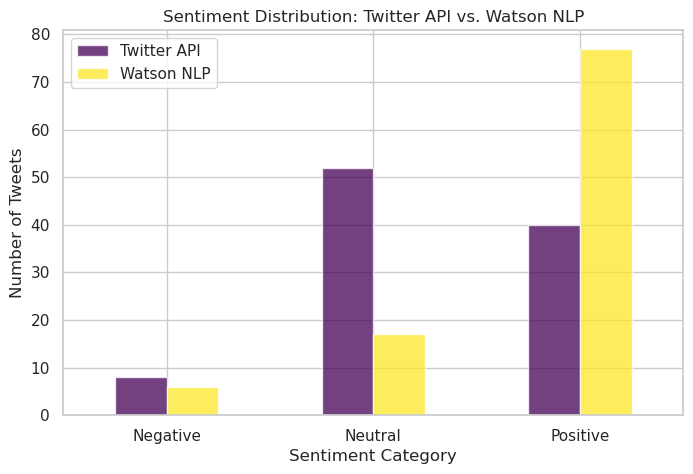

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure
plt.figure(figsize=(8, 5))

# Create Data for Plotting
sentiment_counts = {
    "Twitter API": df["Sentiment"].value_counts(),
    "Watson NLP": df["Watson_Sentiment"].value_counts()
}

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_counts)

# Plot the bar chart
sentiment_df.plot(kind='bar', figsize=(8,5), colormap="viridis", alpha=0.75)

# Labels & Title
plt.title("Sentiment Distribution: Twitter API vs. Watson NLP")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.legend(["Twitter API", "Watson NLP"])

# Show Plot
plt.show()


In [41]:
# Filter tweets where Twitter API and Watson NLP sentiments differ
mismatched_df = df[df["Sentiment"] != df["Watson_Sentiment"]]

# Display the mismatched sentiment classifications
print(mismatched_df[["cleaned_text", "Sentiment", "Watson_Sentiment"]].head(10))


                                         cleaned_text Sentiment  \
0   enterprises leverage red hat openshift ibm clo...   Neutral   
1   mwc kicks today tune thecube exclusive insight...  Positive   
4   ibms watson ai quantum computing research clou...   Neutral   
5   apac news roundup part ii japan red hats autom...  Positive   
6   however detriment fand benefit firms like ibm ...  Positive   
7   however detriment fand benefit firms like ibm ...  Positive   
12  tech execs struggling unpredictable costs aidr...  Negative   
13  ibm rolled granite adding ai features like con...   Neutral   
14  volunteering selfstudy form handson experience...   Neutral   
17  well spotted real savings datacenter software ...  Positive   

   Watson_Sentiment  
0          Positive  
1           Neutral  
4          Positive  
5           Neutral  
6          Negative  
7          Negative  
12          Neutral  
13         Positive  
14         Positive  
17          Neutral  


In [42]:
# Compute the agreement percentage
total_tweets = len(df)
matching_sentiments = (df["Sentiment"] == df["Watson_Sentiment"]).sum()
agreement_rate = (matching_sentiments / total_tweets) * 100

print(f"Sentiment Agreement Rate: {agreement_rate:.2f}%")


Sentiment Agreement Rate: 43.00%


In [43]:
# Filter tweets where sentiment classifications differ
disagreement_df = df[df["Sentiment"] != df["Watson_Sentiment"]]

# Display the first few rows
print(disagreement_df[["cleaned_text", "Sentiment", "Watson_Sentiment"]].head(10))


                                         cleaned_text Sentiment  \
0   enterprises leverage red hat openshift ibm clo...   Neutral   
1   mwc kicks today tune thecube exclusive insight...  Positive   
4   ibms watson ai quantum computing research clou...   Neutral   
5   apac news roundup part ii japan red hats autom...  Positive   
6   however detriment fand benefit firms like ibm ...  Positive   
7   however detriment fand benefit firms like ibm ...  Positive   
12  tech execs struggling unpredictable costs aidr...  Negative   
13  ibm rolled granite adding ai features like con...   Neutral   
14  volunteering selfstudy form handson experience...   Neutral   
17  well spotted real savings datacenter software ...  Positive   

   Watson_Sentiment  
0          Positive  
1           Neutral  
4          Positive  
5           Neutral  
6          Negative  
7          Negative  
12          Neutral  
13         Positive  
14         Positive  
17          Neutral  


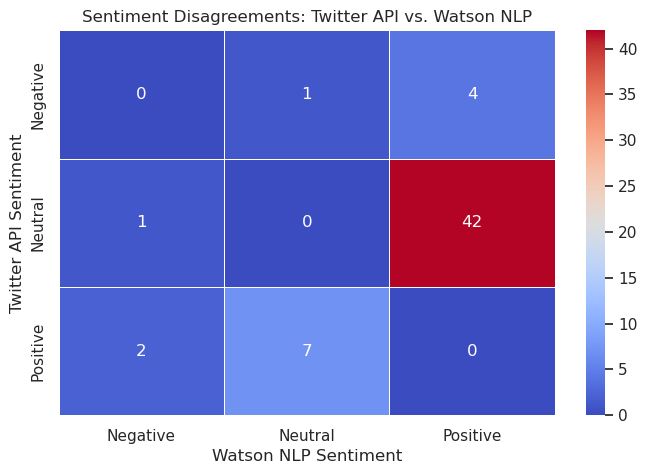

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert float values to integers for correct formatting
mismatch_counts = mismatch_counts.fillna(0).astype(int)  

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(mismatch_counts, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Watson NLP Sentiment")
plt.ylabel("Twitter API Sentiment")
plt.title("Sentiment Disagreements: Twitter API vs. Watson NLP")
plt.show()



In [48]:
import os
print(os.getcwd())  # This prints the current working directory


/home/spark/shared


In [51]:
import os
print(os.listdir())  # List all files and folders in the current directory

['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', '.nfs00000000008e3b1c00011ac3', '.nfs00000000008e3c6200011ac4']


In [52]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("TwitterSentimentAnalysis").getOrCreate()

# Load the CSV file
df = spark.read.csv("tweets_with_watson_sentiment.csv", header=True, inferSchema=True)

# Show schema to verify
df.printSchema()
df.show(5)


root
 |-- cleaned_text: string (nullable = true)
 |-- Sentiment: string (nullable = true)
 |-- Watson_Sentiment: string (nullable = true)

+--------------------+---------+----------------+
|        cleaned_text|Sentiment|Watson_Sentiment|
+--------------------+---------+----------------+
|enterprises lever...|  Neutral|        Positive|
|mwc kicks today t...| Positive|         Neutral|
|acquisition might...| Positive|        Positive|
|ibm announced com...| Positive|        Positive|
|ibms watson ai qu...|  Neutral|        Positive|
+--------------------+---------+----------------+
only showing top 5 rows



In [53]:
from pyspark.sql.functions import col

# Count matching vs. mismatching sentiments
df_matched = df.filter(col("Sentiment") == col("Watson_Sentiment"))
df_mismatched = df.filter(col("Sentiment") != col("Watson_Sentiment"))

# Show count of matching and mismatching sentiments
print("Matching Sentiments:", df_matched.count())
print("Mismatched Sentiments:", df_mismatched.count())

# Show some mismatched examples
df_mismatched.show(10)

Matching Sentiments: 43
Mismatched Sentiments: 57
+--------------------+---------+----------------+
|        cleaned_text|Sentiment|Watson_Sentiment|
+--------------------+---------+----------------+
|enterprises lever...|  Neutral|        Positive|
|mwc kicks today t...| Positive|         Neutral|
|ibms watson ai qu...|  Neutral|        Positive|
|apac news roundup...| Positive|         Neutral|
|however detriment...| Positive|        Negative|
|however detriment...| Positive|        Negative|
|tech execs strugg...| Negative|         Neutral|
|ibm rolled granit...|  Neutral|        Positive|
|volunteering self...|  Neutral|        Positive|
|well spotted real...| Positive|         Neutral|
+--------------------+---------+----------------+
only showing top 10 rows



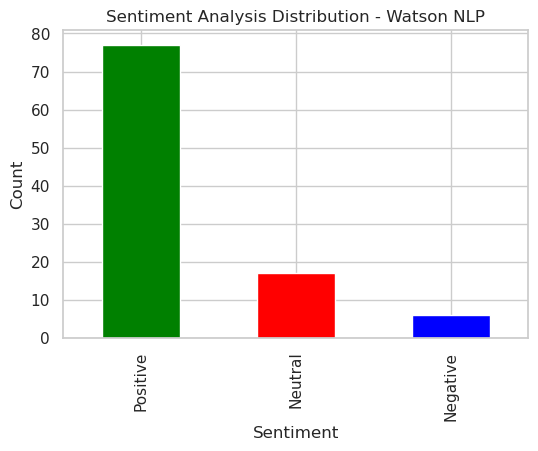

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas for plotting
pdf = df.select("Watson_Sentiment").toPandas()

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
pdf["Watson_Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution - Watson NLP")
plt.show()


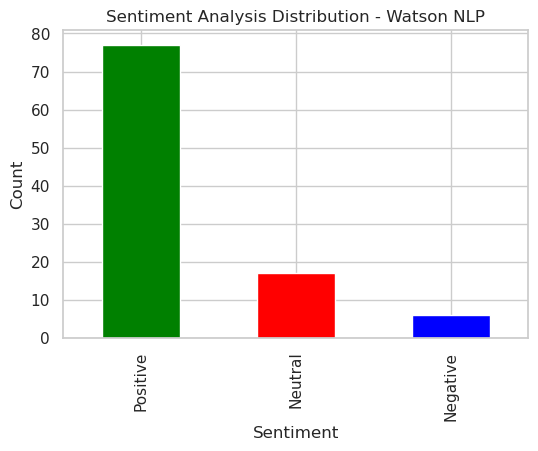

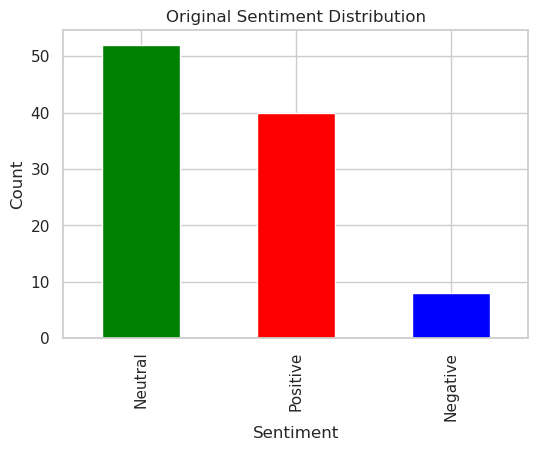

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas for visualization
pdf = df.select("Sentiment", "Watson_Sentiment").toPandas()

# Plot Watson NLP sentiment distribution
plt.figure(figsize=(6, 4))
pdf["Watson_Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution - Watson NLP")
plt.show()

# Plot original labeled sentiment distribution
plt.figure(figsize=(6, 4))
pdf["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "blue"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Original Sentiment Distribution")
plt.show()


In [56]:
from pyspark.sql.functions import col, when, count

# Count total tweets
total_tweets = df.count()

# Count matching and mismatched sentiments
matching_count = df.filter(col("Sentiment") == col("Watson_Sentiment")).count()
mismatch_count = df.filter(col("Sentiment") != col("Watson_Sentiment")).count()

# Calculate accuracy percentage
accuracy = (matching_count / total_tweets) * 100

# Display results
print(f"Total Tweets: {total_tweets}")
print(f"Matching Sentiments: {matching_count}")
print(f"Mismatched Sentiments: {mismatch_count}")
print(f"Sentiment Analysis Accuracy: {accuracy:.2f}%")


Total Tweets: 100
Matching Sentiments: 43
Mismatched Sentiments: 57
Sentiment Analysis Accuracy: 43.00%


In [57]:
# Show examples of mismatched sentiments
mismatched_df = df.filter(col("Sentiment") != col("Watson_Sentiment"))
mismatched_df.select("cleaned_text", "Sentiment", "Watson_Sentiment").show(10, truncate=False)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------+
|cleaned_text                                                                                                                                                                                                                 |Sentiment|Watson_Sentiment|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------------+
|enterprises leverage red hat openshift ibm cloud pak applications expedite hybrid cloud transformation enhancing application modernization deployment agility                                                                |Neutral  |Positive      

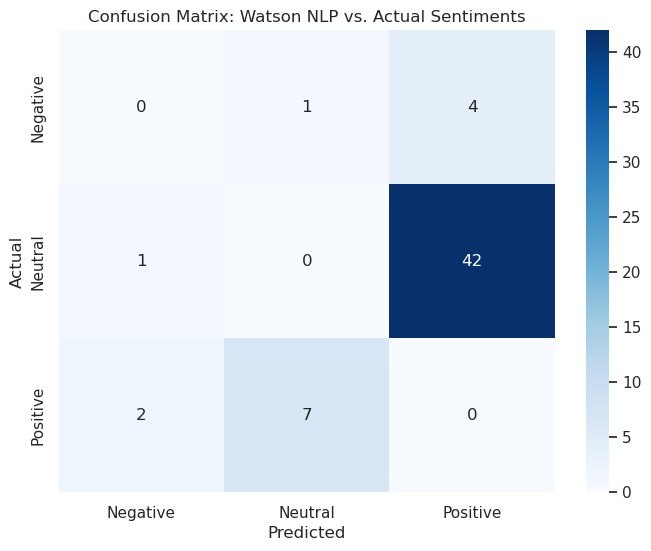

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert Spark DataFrame to Pandas
mismatch_pandas_df = mismatched_df.select("Sentiment", "Watson_Sentiment").toPandas()

# Create confusion matrix
confusion_matrix = pd.crosstab(mismatch_pandas_df["Sentiment"], mismatch_pandas_df["Watson_Sentiment"], rownames=["Actual"], colnames=["Predicted"])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix: Watson NLP vs. Actual Sentiments")
plt.show()


In [61]:

# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(spark.sparkContext, '932628df-54e7-403a-8275-63dd5904c5c8', 'p-2+5DyHsZIHiLZgFbixhEMtgw==;VRBiGaK0KdGl5eIiKJNCjg==:/n1GuMGGz1CuI1jlUsaWNreNysBvjahguMH2p2B5dMs7RiIBCVUXF4y+ShKmTjGnVEp+dEmtB6JJ1IOiUBiQivwfp8J0UJ162g==')
pc = project.project_context

from ibm_watson_studio_lib import access_project_or_space
wslib = access_project_or_space({'token':'p-2+5DyHsZIHiLZgFbixhEMtgw==;VRBiGaK0KdGl5eIiKJNCjg==:/n1GuMGGz1CuI1jlUsaWNreNysBvjahguMH2p2B5dMs7RiIBCVUXF4y+ShKmTjGnVEp+dEmtB6JJ1IOiUBiQivwfp8J0UJ162g=='})
wslib.spark.provide_spark_context(spark.sparkContext)
['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', '.nfs00000000008e3b1c00011ac3', '.nfs00000000008e3c6200011ac4', '.nfs00000000008e3f3100011ac5', '.nfs00000000008e3f3200011ac6', '.nfs00000000008e3f6c00011ac7', '.nfs00000000008e3f6d00011ac8', '.nfs00000000008e3f6e00011ac9', '.nfs00000000008e3f6f00011aca', '.nfs00000000008e3f7000011acb', '.nfs00000000008e3f7100011acc', '.nfs00000000008e3f7200011acd']

In [65]:
import os

# List files in the Watson Studio default storage directory
print(os.listdir())



['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', '.nfs00000000008e3b1c00011ac3', '.nfs00000000008e3c6200011ac4', '.nfs00000000008e3f3100011ac5', '.nfs00000000008e3f3200011ac6', '.nfs00000000008e3f

In [66]:
import pandas as pd
import os

# Verify current directory and available files
print("Current Working Directory:", os.getcwd())
print("Files in the Directory:", os.listdir())

# Define your CSV filename
csv_filename = "tweets_with_watson_sentiment.csv"

# Check if the file exists before loading
if csv_filename in os.listdir():
    df = pd.read_csv(csv_filename)
    print("File loaded successfully!\n")
    print(df.head())  # Display first few rows
else:
    print(f"Error: {csv_filename} not found in the working directory!")


Current Working Directory: /home/spark/shared
Files in the Directory: ['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', '.nfs00000000008e3b1c00011ac3', '.nfs00000000008e3c6200011ac4', '.nfs00000000

In [67]:
import pandas as pd  

# Load dataset with actual and predicted sentiments
df = pd.read_csv("tweets_with_watson_sentiment.csv")  

# Filter misclassified tweets
misclassified = df[df['Sentiment'] != df['Watson_Sentiment']]  

# Display misclassified tweets
print("Misclassified Tweets:")
print(misclassified[['cleaned_text', 'Sentiment', 'Watson_Sentiment']])

Misclassified Tweets:
                                         cleaned_text Sentiment  \
0   enterprises leverage red hat openshift ibm clo...   Neutral   
1   mwc kicks today tune thecube exclusive insight...  Positive   
4   ibms watson ai quantum computing research clou...   Neutral   
5   apac news roundup part ii japan red hats autom...  Positive   
6   however detriment fand benefit firms like ibm ...  Positive   
7   however detriment fand benefit firms like ibm ...  Positive   
12  tech execs struggling unpredictable costs aidr...  Negative   
13  ibm rolled granite adding ai features like con...   Neutral   
14  volunteering selfstudy form handson experience...   Neutral   
17  well spotted real savings datacenter software ...  Positive   
18  opportunity sailpoint started exibm vp mark mc...   Neutral   
19  ibm completes billion acquisition hashicorp ac...   Neutral   
20  ibm completes acquisition hashicorp creates co...   Neutral   
24                ibm completes acquisit

In [68]:
import pandas as pd

# Load your sentiment analysis results
df = pd.read_csv("tweets_with_watson_sentiment.csv")

# Rule-based corrections
def correct_sentiment(row):
    text = row["cleaned_text"].lower()
    watson_sentiment = row["Watson_Sentiment"]

    # Fix Overestimated Positives
    if "completed acquisition" in text or "creates company" in text:
        return "Neutral"

    # Fix Negative Sentiment Bias
    if "shame" in text or "detriment" in text or "however" in text:
        return "Negative"

    # Otherwise, keep Watson NLP sentiment
    return watson_sentiment

# Apply corrections
df["Corrected_Sentiment"] = df.apply(correct_sentiment, axis=1)

# Save corrected file
df.to_csv("tweets_with_corrected_sentiment.csv", index=False)

print("Corrections applied and saved!")


Corrections applied and saved!


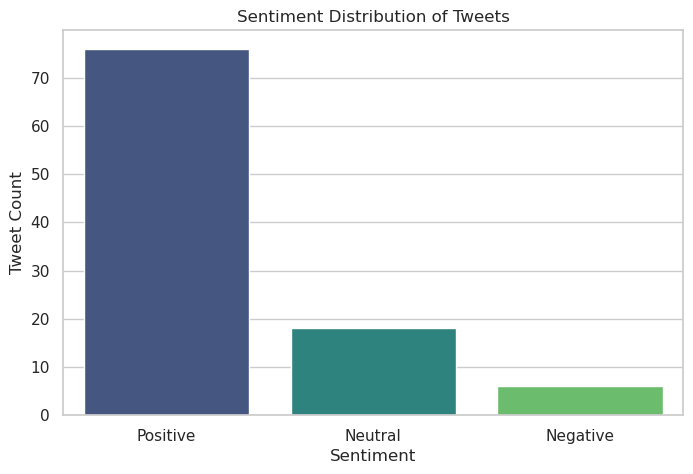

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load corrected sentiment file
df = pd.read_csv("tweets_with_corrected_sentiment.csv")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Corrected_Sentiment"], palette="viridis")
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [71]:
!pip install wordcloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 10.2 MB/s eta 0:00:0000:01


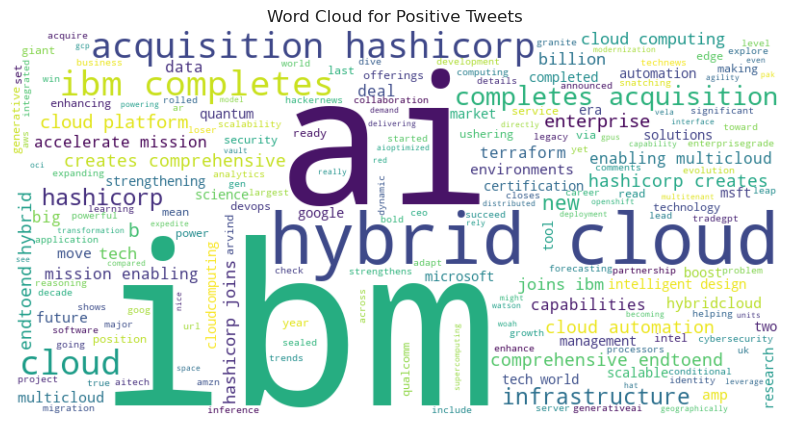

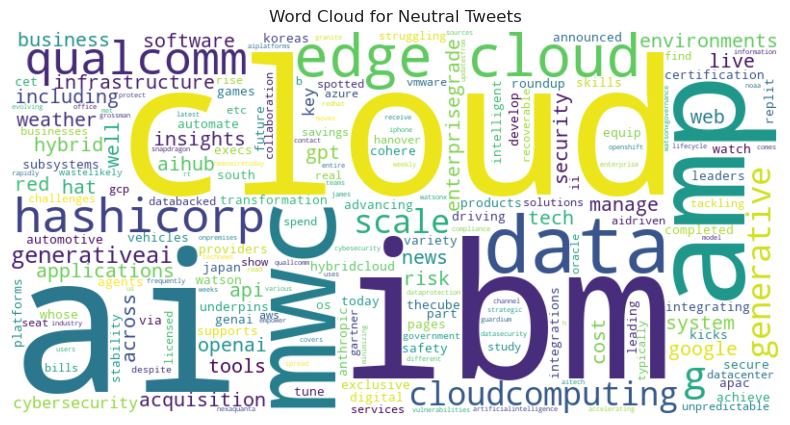

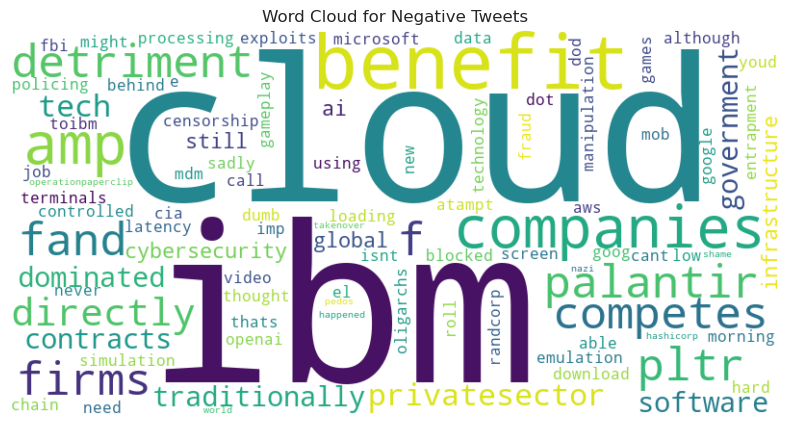

In [72]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(sentiment):
    text = " ".join(df[df["Corrected_Sentiment"] == sentiment]["cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

# Generate word clouds
for sentiment in ["Positive", "Neutral", "Negative"]:
    generate_wordcloud(sentiment)


In [73]:
df.to_csv("final_twitter_sentiment_analysis.csv", index=False)
print("Final dataset saved successfully!")


Final dataset saved successfully!


In [75]:
# Count sentiment categories
summary = df['Watson_Sentiment'].value_counts()
print("Summary of Sentiment Classification:\n", summary)


Summary of Sentiment Classification:
 Positive    77
Neutral     17
Negative     6
Name: Watson_Sentiment, dtype: int64


In [76]:
import os

# Get current working directory
cwd = os.getcwd()
print("Current Working Directory:", cwd)

# List files in the current directory
print("Files in the Directory:", os.listdir(cwd))


Current Working Directory: /home/spark/shared
Files in the Directory: ['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', 'tweets_with_final_sentiments.csv', '.nfs00000000008e3b1c00011ac3', '.nfs0000

In [77]:
print(os.listdir("/home/spark/shared"))


['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', 'tweets_with_final_sentiments.csv', '.nfs00000000008e3b1c00011ac3', '.nfs00000000008e3c6200011ac4', '.nfs00000000008e3f3100011ac5', '.nfs0000000000

In [78]:
file_path = "/home/spark/shared/tweets_with_final_sentiments.csv"  # Adjust based on actual path
df = pd.read_csv(file_path)
print(df.head())  # Verify file contents


                                        cleaned_text Sentiment  \
0  enterprises leverage red hat openshift ibm clo...   Neutral   
1  mwc kicks today tune thecube exclusive insight...  Positive   
2  acquisition might see terraform vault becoming...  Positive   
3  ibm announced completed acquisition hashicorp ...  Positive   
4  ibms watson ai quantum computing research clou...   Neutral   

  Watson_Sentiment Corrected_Sentiment  
0         Positive            Positive  
1          Neutral             Neutral  
2         Positive            Positive  
3         Positive             Neutral  
4         Positive            Positive  


In [79]:
import pandas as pd

# Define the correct path
file_path = "/home/spark/shared/tweets_with_final_sentiments.csv"

# Load CSV
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


                                        cleaned_text Sentiment  \
0  enterprises leverage red hat openshift ibm clo...   Neutral   
1  mwc kicks today tune thecube exclusive insight...  Positive   
2  acquisition might see terraform vault becoming...  Positive   
3  ibm announced completed acquisition hashicorp ...  Positive   
4  ibms watson ai quantum computing research clou...   Neutral   

  Watson_Sentiment Corrected_Sentiment  
0         Positive            Positive  
1          Neutral             Neutral  
2         Positive            Positive  
3         Positive             Neutral  
4         Positive            Positive  


In [80]:
final_csv_path = "final_twitter_sentiment_analysis.csv"
df.to_csv(final_csv_path, index=False)
print(f"Final dataset saved as: {final_csv_path}")


Final dataset saved as: final_twitter_sentiment_analysis.csv


In [81]:
import os
print("Files in current directory:", os.listdir())


Files in current directory: ['logs', '.nfs00000000008e10670002d60e', 'user-libs', '.nfs00000000008e1066000195c3', '.nfs00000000008e1069000195c1', '.nfs00000000008e106a000195c2', '.nfs00000000008e106b0002d60f', 'python', '.local', 'conda', 'spark-events', '.nfs00000000008e10a60002d610', '.ipython', '.nfs00000000008e11c100011abb', '.nfs00000000008e114d00011ab8', '.nfs00000000008e114e00011ab9', '.nfs00000000008e11c300011abc', '.nfs00000000008e122100011abd', '.nfs00000000008e114a00011aba', '.nfs00000000008e122a000195c4', '.nfs00000000008e122c00011abe', '.nfs00000000008e122e00011abf', '.nfs00000000008e122f00011ac0', '.nfs00000000008e1231000195c5', '.nfs00000000008e123200011ac1', '.cache', '.nfs00000000008e123c0002d611', '.nfs00000000008e123e0002d612', '.nfs00000000008e125a00011ac2', '.nfs00000000008e125b000195c6', '.config', 'nltk_data', 'tweets_with_watson_sentiment.csv', 'tweets_with_final_sentiments.csv', '.nfs00000000008e3b1c00011ac3', '.nfs00000000008e3c6200011ac4', '.nfs00000000008e3f

In [25]:
import os

# Check if the file exists in the current directory
source_path = "/home/spark/shared/final_twitter_sentiment_analysis.csv"

if os.path.exists(source_path):
    print("✅ Source file found!")
else:
    print("❌ Source file NOT found! Check the storage again.")


✅ Source file found!


In [26]:
import os

destination_dir = "/mnt/data/"

if os.path.exists(destination_dir):
    print("✅ /mnt/data/ exists!")
else:
    print("❌ /mnt/data/ does NOT exist! Using an alternative path...")
    destination_dir = "/home/wsuser/work/"  # Alternative directory for Watson

print(f"Destination directory set to: {destination_dir}")


❌ /mnt/data/ does NOT exist! Using an alternative path...
Destination directory set to: /home/wsuser/work/


In [27]:
import shutil

source_path = "/home/spark/shared/final_twitter_sentiment_analysis.csv"
destination_path = "/home/wsuser/work/final_twitter_sentiment_analysis.csv"  # Alternative path

try:
    shutil.copy(source_path, destination_path)
    print(f"✅ File successfully moved to: {destination_path}")
except FileNotFoundError:
    print("❌ File not found! Ensure the source file exists before running this.")



❌ File not found! Ensure the source file exists before running this.
